Image Processing
================


This notebook shows examples of using `aotools` to do the following:
- Measure properties of point sources
- Measure properties of extended sources


In [ ]:
import numpy
import matplotlib.pylab as plt
from tqdm import tqdm, trange, tqdm_notebook
from astropy.io import fits
%matplotlib inline
import aotools
from aotools.turbulence import infinitephasescreen
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.colors as colors
from aotools.turbulence.infinitephasescreen import PhaseScreenKolmogorov

import scipy.signal
j = 0+1j

Measuring the Position of a Point Source
----------------------------------------

First we need to create our PSF. To do this we are going to simply take our aperture function example from the previous notebook. 

In [3]:
# Set up parameters for creating phase screens
nx_size = 64

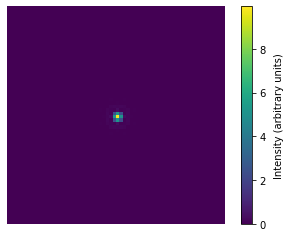

In [40]:
pupil = aotools.circle(nx_size/2, nx_size)

padded_pupil = numpy.zeros((nx_size*2, nx_size*2))
y, x = padded_pupil.shape
padded_pupil[:nx_size, :nx_size] = pupil

# Use AOtools to transform from the pupil to the focal plane
psf = numpy.abs(aotools.ft2(padded_pupil, delta=D*2/nx_size,)**2.)

psf_cut= psf[int(y/2-nx_size/2):int(y/2+nx_size/2), int(y/2-nx_size/2):int(y/2+nx_size/2)]

plt.figure()
plt.imshow(psf_cut)
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Intensity (arbitrary units)', labelpad=8)

To measure the position of this PSF we can "centroid" it using any number of different techniques. The simplist is a centre of gravity, and can be used:

In [36]:
centroid = aotools.centre_of_gravity(psf)
print(centroid)

[64. 64.]


This gives us the position of the PSF, in our example using 64 x 64 pixel pupil with a factor of 2 oversampling the PSF is centred, so the `centre_of_gravity` method returns the pixel position of the centre.

In [32]:
D = 1.
pxl_scale = D/nx_size
r0 = 0.32
L0 = 100
wind_speed = 10 #m/s - just arbitrarily set
stencil_length_factor = 32
wavelength = 500e-9

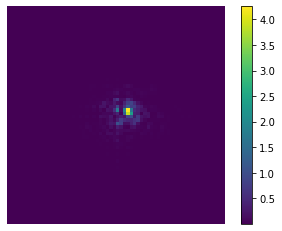

In [38]:
# Create the phase screen object using aotools
phase_screen = infinitephasescreen.PhaseScreenKolmogorov(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)
wavefront = phase_screen.scrn
wavefront *= aotools.circle(nx_size/2, nx_size)
complex_phase = numpy.exp(j*wavefront)

padded_pupil = numpy.zeros((nx_size*2, nx_size*2), dtype=numpy.complex64)
padded_pupil[:nx_size, :nx_size] = complex_phase

# Use AOtools to transform from the pupil to the focal plane
psf = numpy.abs(aotools.ft2(padded_pupil, delta=D*2/nx_size,)**2.)

psf_cut= psf[int(y/2-nx_size/2):int(y/2+nx_size/2), int(y/2-nx_size/2):int(y/2+nx_size/2)]

# Plot the PSF
plt.figure()
plt.imshow(psf_cut)
plt.axis('off')
cbar = plt.colorbar()


In [39]:
centroid = aotools.centre_of_gravity(psf)
print(centroid)

[66.30578063 63.08774449]


The PSF has moved. Note that the units here are pixels, and needs to be converted to the physical simulation units (_e.g._ arcseconds). This is done similarly to how it was described previously.

Now you have all the tools and knowledge to make your own Shack-Hartmann wavefront sensor, and the ability to process the images produced by it.

> HINT: A Shack-Hartmann is essentially a grid placed across a pupil, with each "box" forming its own imaging system.